In [45]:
import geopandas as gpd
import movingpandas as mpd
from datetime import datetime
from pyproj import CRS

In [33]:
iceberg_name = "a69a"

In [34]:
df = gpd.read_file(f'data/stats_database_v5/stats/{iceberg_name}.csv')

In [35]:
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry
0,2020191,0,0,6,-69.015,-60.503,0,1924.42,0,None
1,2020192,1,6.369,6,-68.959,-60.529,0,1922.42,0,None
2,2020193,1,3.557,7,-68.99,-60.547,0,1920.42,0,None
3,2020194,1,0.18,7,-68.989,-60.549,0,1918.42,0,None
4,2020195,1,0.276,7,-68.987,-60.553,0,1916.42,0,None


In [36]:
df['geometry'] = gpd.GeoSeries.from_xy(df['lon'], df['lat'], crs='epsg:3031')
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry
0,2020191,0,0,6,-69.015,-60.503,0,1924.42,0,POINT (-60.503 -69.015)
1,2020192,1,6.369,6,-68.959,-60.529,0,1922.42,0,POINT (-60.529 -68.959)
2,2020193,1,3.557,7,-68.99,-60.547,0,1920.42,0,POINT (-60.547 -68.990)
3,2020194,1,0.18,7,-68.989,-60.549,0,1918.42,0,POINT (-60.549 -68.989)
4,2020195,1,0.276,7,-68.987,-60.553,0,1916.42,0,POINT (-60.553 -68.987)


<AxesSubplot:>

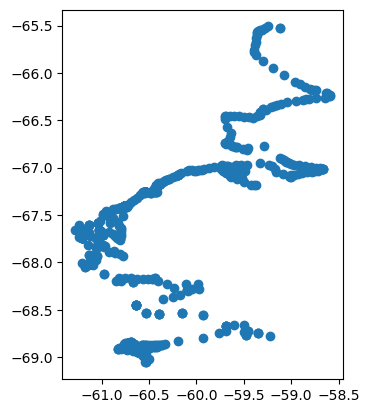

In [37]:
df.plot()

In [15]:
type(df.date[0])

str

In [38]:
df.date = [datetime.strptime(date, '%Y%j') for date in df.date]
# df.date = datetime.strptime(x, '%Y-%m-%d') for x in df.date

In [39]:
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry
0,2020-07-09,0,0,6,-69.015,-60.503,0,1924.42,0,POINT (-60.503 -69.015)
1,2020-07-10,1,6.369,6,-68.959,-60.529,0,1922.42,0,POINT (-60.529 -68.959)
2,2020-07-11,1,3.557,7,-68.99,-60.547,0,1920.42,0,POINT (-60.547 -68.990)
3,2020-07-12,1,0.18,7,-68.989,-60.549,0,1918.42,0,POINT (-60.549 -68.989)
4,2020-07-13,1,0.276,7,-68.987,-60.553,0,1916.42,0,POINT (-60.553 -68.987)


In [40]:
traj = mpd.Trajectory(df, iceberg_name, t='date', x='lon', y='lat', crs='epsg:3031')

In [42]:
traj.df.head()

,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry
date,,,,,,,,,
2020-07-09,0,0,6,-69.015,-60.503,0,1924.42,0,POINT (-60.503 -69.015)
2020-07-10,1,6.369,6,-68.959,-60.529,0,1922.42,0,POINT (-60.529 -68.959)
2020-07-11,1,3.557,7,-68.99,-60.547,0,1920.42,0,POINT (-60.547 -68.990)
2020-07-12,1,0.18,7,-68.989,-60.549,0,1918.42,0,POINT (-60.549 -68.989)
2020-07-13,1,0.276,7,-68.987,-60.553,0,1916.42,0,POINT (-60.553 -68.987)


c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

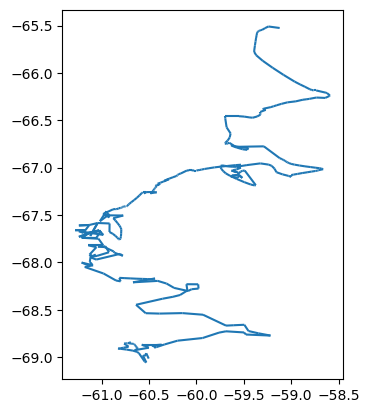

In [43]:
traj.plot()

In [46]:
traj.to_crs(CRS(3031))

Trajectory a69a (2020-07-09 00:00:00 to 2022-04-25 00:00:00) | Size: 635 | Length: 22.4m
Bounds: (-61.28, -69.056, -58.59, -65.51)
LINESTRING (-60.503 -69.015, -60.529 -68.959, -60.547 -68.99, -60.549 -68.989, -60.553 -68.987, -60.

In [47]:
traj.hvplot()

# WHYYYY

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


ValueError: Cannot transform naive geometries.  Please set a crs on the object first.